In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import uproot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

import ROOT
from ROOT import TFile, TH1F, TCanvas, TMath,TLine, TH1, TLegend
import copy
import array
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetBarWidth(1);
ROOT.gStyle.SetHistLineWidth(1);
import sys
sys.path.append("/eos/home-x/xuyan/TrijetProj/TrijetAna_Main/ZprimeAna/utiles")
from CMSStyle import CMS_lumi

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.metrics import confusion_matrix
import seaborn as sns

print(sns.__version__)
print(xgb.__version__)

plt.rcParams['figure.figsize'] = (12, 10)  # Set the default figure size
plt.rcParams['legend.fontsize'] = 20  # Set the default font size for legends
plt.rcParams['axes.labelsize'] = 14  # Set the default font size for axis labels (x and y)
plt.rcParams['axes.titlesize'] = 16  # Set the default font size for the plot title
plt.rcParams['xtick.labelsize'] = 12  # Set the default font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 12  # Set the default font size for y-tick labels
plt.rcParams['lines.linewidth'] = 1.5  # Set the default line width
plt.rcParams['lines.markersize'] = 8  # Set the default marker size

Welcome to JupyROOT 6.30/04


2024-03-10 22:03:03.444366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-10 22:03:06.493493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.11.2
2.0.2


In [24]:
cl = 0
pds = []

for s in ["quad"]:
    for c in ["class1","class2","class3","class4_dataSB"]:
        flat_tree = uproot.open(f"Tree_{s}_presel_lowq2_{c}.root")['Events']
        df_temp = None
        df_tree = flat_tree.arrays(library='pd')
        if c != "class4_dataSB":
            df_temp = df_tree[(df_tree["BCand_mass_fullfit"] > 5.0) & (df_tree["BCand_mass_fullfit"] < 5.6)]
        else:
            df_temp = df_tree
        num_rows, num_columns = df_temp.shape
        print(num_rows, num_columns)
        df_temp["label"] = cl
        df_temp['label_traning'] = -99
        df_temp['BCand_sigImpact_llKs'] = -99
        cl+=1
        pds.append(df_temp)
        
df = pd.concat(pds, axis = 0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

label_traning = 1
for icl in range(0,4):
    if icl == 0:
        df.loc[df["label"] == icl, "label_traning"] = label_traning
        label_traning -= 1
    else:
        df.loc[df["label"] == icl, "label_traning"] = label_traning

y = df["label_traning"]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

X_train = X_train.drop(columns=["label",'label_traning',"BCand_mass_fullfit",'BCand_mll_fullfit_norm',"BCand_mll_fullfit","BCand_fit_l1_pt","BCand_fit_l2_pt","BCand_fit_trk1_pt","BCand_fit_trk2_pt","BCand_fit_pt"])
X_test = X_test.drop(columns=["label",'label_traning',"BCand_mass_fullfit",'BCand_mll_fullfit_norm',"BCand_mll_fullfit","BCand_fit_l1_pt","BCand_fit_l2_pt","BCand_fit_trk1_pt","BCand_fit_trk2_pt","BCand_fit_pt"])

print(y_train)
print(X_train.columns)
print(X_train.shape[1])

35601 42


/tmp/ipykernel_532/919451578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["label"] = cl
/tmp/ipykernel_532/919451578.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label_traning'] = -99
/tmp/ipykernel_532/919451578.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

8151 42


/tmp/ipykernel_532/919451578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["label"] = cl
/tmp/ipykernel_532/919451578.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label_traning'] = -99
/tmp/ipykernel_532/919451578.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

3781 42


/tmp/ipykernel_532/919451578.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["label"] = cl
/tmp/ipykernel_532/919451578.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['label_traning'] = -99
/tmp/ipykernel_532/919451578.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

24457 42
12865    0
8731     0
6377     1
21185    1
3298     1
        ..
2838     0
7197     1
7358     0
1008     1
18111    1
Name: label_traning, Length: 50387, dtype: int64
Index(['BCand_fit_l1_pt_norm', 'BCand_fit_l2_pt_norm',
       'BCand_fit_trk1_pt_norm', 'BCand_fit_trk2_pt_norm', 'BCand_fit_pt_norm',
       'BCand_fit_cos2D', 'BCand_cosAlpha3D', 'BCand_svprob', 'BCand_sigLxy',
       'BCand_dR_ll', 'BCand_MomenAsym_lltrk1', 'BCand_MomenAsym_lltrk2',
       'BCand_MomenAsym_llKs', 'BCand_iso04_l1_norm', 'BCand_iso04_l2_norm',
       'BCand_iso04_trk1_norm', 'BCand_iso04_trk2_norm',
       'BCand_sigImpact_lltrk1', 'BCand_sigImpact_lltrk2',
       'BCand_sigImpact_llKs', 'BCand_dR_l1trk1', 'BCand_dR_l1trk2',
       'BCand_dR_l2trk1', 'BCand_dR_l2trk2', 'BCand_dR_trk1trk2',
       'BCand_dz_l1trk1', 'BCand_dz_l1trk2', 'BCand_dz_l2trk1',
       'BCand_dz_l2trk2', 'BCand_dz_trk1trk2', 'BCand_l1_ID', 'BCand_l2_ID',
       'BCand_evt_nTri', 'BCand_evt_nQuad'],
      dtype='object'

In [27]:
# binary
# Define the DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # Change to binary logistic objective for binary classification
    'max_depth': 4,  # Depth of the trees, can be adjusted based on the complexity of your data
    'learning_rate': 0.1,  # Step size shrinkage used to prevent overfitting, can be fine-tuned
    'seed': 42,  # For reproducibility, ensures that your results are the same each time you run your script
    # Optional parameters for binary classification:
    # 'eval_metric': 'logloss',  # Evaluation metric for validation data, common choice is log loss for binary classification
}

# Additional parameters for the training
num_rounds = 70

bst = xgb.train(params, dtrain, num_rounds)

# Make predictions on train set
train_scores = bst.predict(dtrain, output_margin=True)

# Convert the DMatrix back to DataFrame
df_train = pd.DataFrame(dtrain.get_label(), columns=['label'])
df_train['score'] = train_scores

# Make predictions on test set
test_scores = bst.predict(dtest, output_margin=True)

# Convert the DMatrix back to DataFrame
df_test = pd.DataFrame(dtest.get_label(), columns=['label'])
df_test['score'] = test_scores

train_scores_labels = []
test_scores_labels = []
for iclass in range(0,2):
    # Segment scores based on label
    train_scores_labels.append(df_train[df_train['label'] == iclass]['score'])
    test_scores_labels.append(df_test[df_test['label'] == iclass]['score'])

0
1



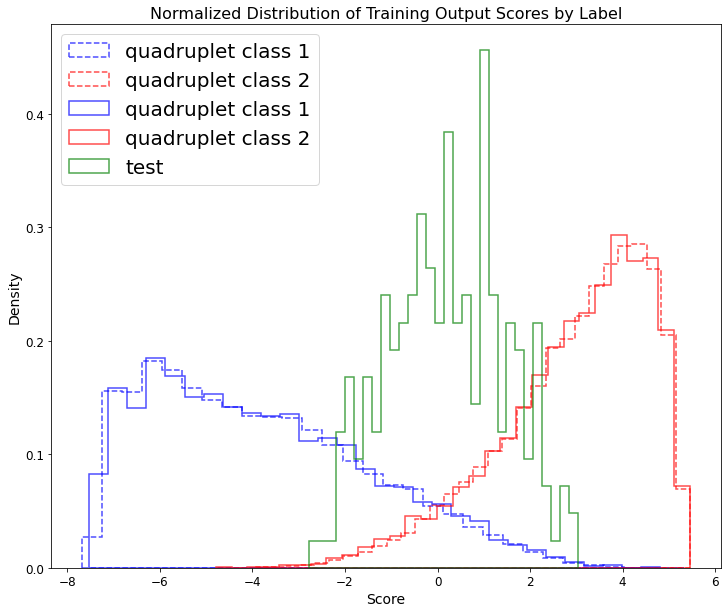

In [28]:
color = ["b","r"]

# Plotting distributions
plt.figure(figsize=(12, 10))
for i, train_scores_label in enumerate(train_scores_labels):
    print(i)
    plt.hist(train_scores_label, bins=30, density=True, alpha=0.7, label=f'quadruplet class {i+1}', 
         edgecolor=color[i], linewidth=1.5, linestyle='dashed',facecolor='none',histtype='stepfilled')
        
for i, test_scores_label in enumerate(test_scores_labels):
    plt.hist(test_scores_label, bins=30, density=True, alpha=0.7, label=f'quadruplet class {i+1}', 
         edgecolor=color[i], linewidth=1.5,facecolor='none',histtype='stepfilled')
    
test_sample = pd.read_csv('test_data.csv')
print()
array = test_sample.values
plt.hist(array, bins=30, density=True, alpha=0.7, label=f'test', 
         edgecolor="g", linewidth=1.5,facecolor='none',histtype='stepfilled')


plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Normalized Distribution of Training Output Scores by Label')
plt.legend()
plt.show()

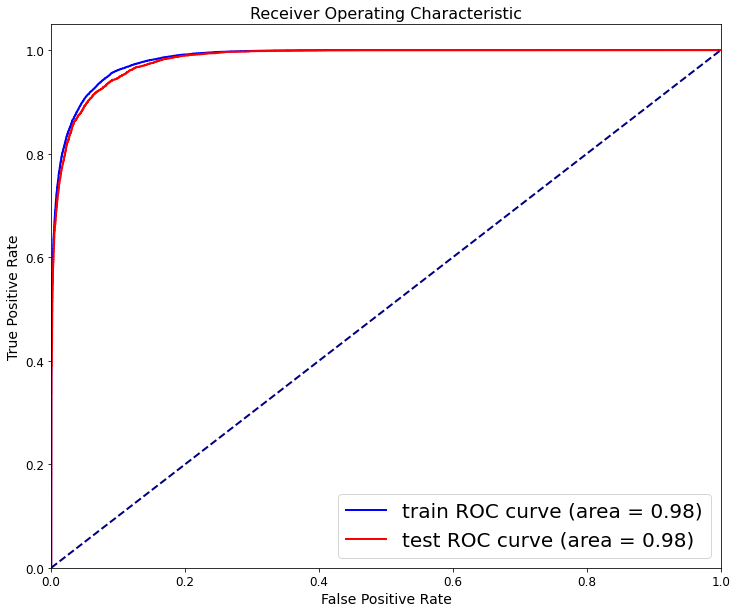

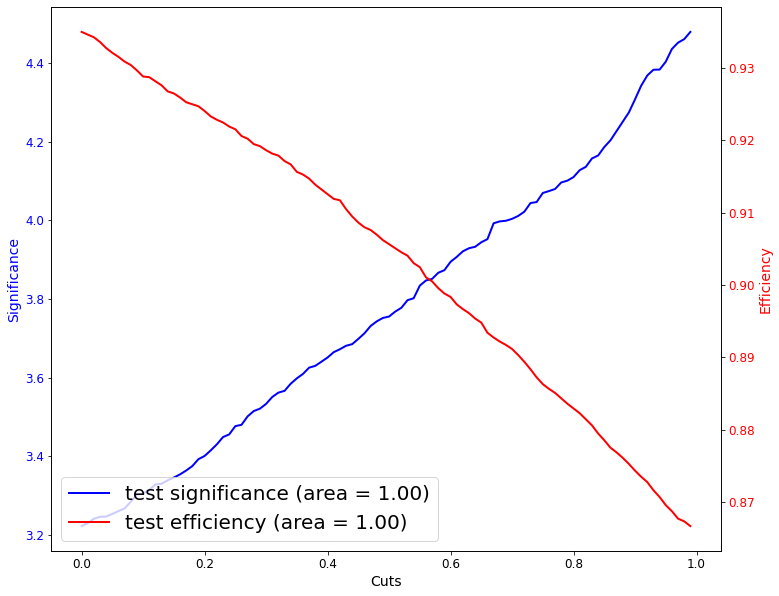

In [29]:
# Concatenate the scores from both classes and the true labels
train_scores_label_0 = train_scores_labels[0]
train_scores_label_1 = train_scores_labels[1]
test_scores_label_0 = test_scores_labels[0]
test_scores_label_1 = test_scores_labels[1]
train_scores = np.concatenate([train_scores_label_0, train_scores_label_1])
train_labels = np.concatenate([np.zeros(len(train_scores_label_0)), np.ones(len(train_scores_label_1))])
test_scores = np.concatenate([test_scores_label_0, test_scores_label_1])
test_labels = np.concatenate([np.zeros(len(test_scores_label_0)), np.ones(len(test_scores_label_1))])

# Compute ROC curve and ROC area
train_fpr, train_tpr, _ = roc_curve(train_labels, train_scores)
train_roc_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, _ = roc_curve(test_labels, test_scores)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curve
plt.figure(figsize=(12, 10))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, color='red', lw=2, label='test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

cuts = np.arange(0, 1, 0.01)
sig_num = [np.sum(np.sort(test_scores_label_1) > value) for value in cuts] 
sig_den = [np.sum(np.sort(test_scores_label_0) > value) for value in cuts] 
sig = np.array(sig_num/np.sqrt(sig_den) / (len(test_scores_label_1) / ROOT.TMath.Sqrt(len(test_scores_label_0))))
eff = np.array(sig_num) / float(len(test_scores_label_1))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the first curve on ax1
ax1.plot(cuts, sig, color='blue', lw=2, label='test significance (area = %0.2f)' % 1)
ax1.set_xlabel('Cuts')
ax1.set_ylabel('Significance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create ax2 that shares the same x-axis as ax1
ax2 = ax1.twinx()

# Plot the second curve on ax2
ax2.plot(cuts, eff, color='red', lw=2, label='test efficiency (area = %0.2f)' % 1)
ax2.set_ylabel('Efficiency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend with a combined list of handles from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower left')

# Show the plot
plt.show()

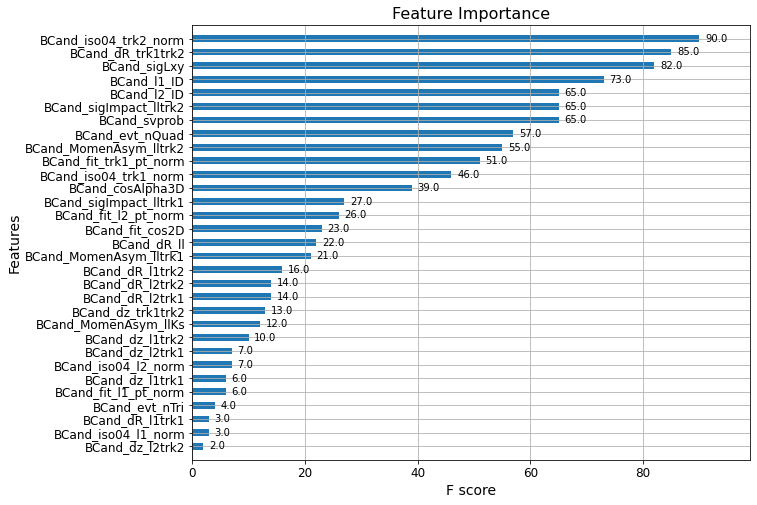

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = xgb.plot_importance(bst,ax=ax,height=0.5)
plt.title('Feature Importance')
plt.show()

In [17]:
bst.save_model('model.bin')

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:04:28] WARNING: /build/jenkins/workspace/lcg_release_pipeline/build/pyexternals/xgboost-2.0.2/src/xgboost/2.0.2/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
